## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from warnings import filterwarnings


# Load dataset 

In [3]:
df = pd.read_csv("Houses.csv")

# EDA

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
drop = ['Id']
df.drop(drop, axis=1, inplace=True)

In [7]:
num_col=df.select_dtypes(include=np.number).columns.tolist()
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
print(df.shape)

(1460, 80)


In [9]:
## Cheking datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
data_info = pd.DataFrame(df.count())
data_info["Missing"]  = df.isna().sum()
data_info["N_unique"] = df.nunique()
data_info["Dtypes"]   = df.dtypes
data_info.rename(columns={0 : "Count"} , inplace=True)
data_info

,Count,Missing,N_unique,Dtypes
MSSubClass,1460,0,15,int64
MSZoning,1460,0,5,object
LotFrontage,1201,259,110,float64
LotArea,1460,0,1073,int64
Street,1460,0,2,object
...,...,...,...,...
MoSold,1460,0,12,int64
YrSold,1460,0,5,int64
SaleType,1460,0,9,object
SaleCondition,1460,0,6,object


In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [13]:
category_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[category_cols] = df[category_cols].astype('category')

In [14]:
pd.DataFrame(df.dtypes).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,category,category,float64,int64,category,category,category,category,category,category,...,category,category,category,category,int64,category,category,category,category,int64


In [15]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,...,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,...,8,3,4,4,21,12,5,9,6,663


## Null Values

In [16]:
null = df.isnull().sum()
df.shape[0]
ratio = null / df.shape[0]
pd.DataFrame({"null": null, "ration": ratio})

,null,ration
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [19]:
null_ratio = null / df.shape[0]
null_ratio = pd.DataFrame({"Null": null, "Null_ratio": null_ratio})
null_ratio[null_ratio["Null_ratio"] > 0.5]

,Null,Null_ratio
Alley,1369,0.937671
MasVnrType,872,0.597260
PoolQC,1453,0.995205
Fence,1179,0.807534
MiscFeature,1406,0.963014


In [20]:
c1 = "MasVnrType MasVnrArea Electrical".split()
df.dropna(subset=c1, inplace=True)

In [21]:
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])

In [22]:
modes

{'BsmtQual': 'Gd',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'GLQ',
 'BsmtFinType2': 'Unf',
 'GarageType': 'Attchd',
 'GarageFinish': 'RFn',
 'GarageQual': 'TA',
 'GarageCond': 'TA'}

In [23]:
df[c2].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,Attchd,RFn,TA,TA


In [24]:
df[c2].mode().iloc[0]

BsmtQual            Gd
BsmtCond            TA
BsmtExposure        No
BsmtFinType1       GLQ
BsmtFinType2       Unf
GarageType      Attchd
GarageFinish       RFn
GarageQual          TA
GarageCond          TA
Name: 0, dtype: object

In [25]:
df.fillna(modes, inplace=True)

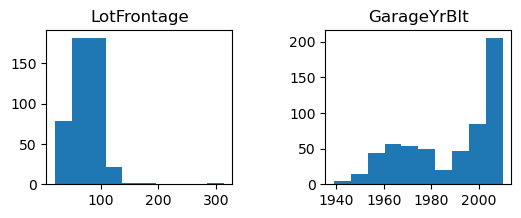

In [27]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [28]:
c2 = ["LotFrontage", "GarageYrBlt"]
medians = dict(df[c2].median())
medians

{'LotFrontage': 76.0, 'GarageYrBlt': 1995.5}

In [29]:
df.fillna(medians, inplace=True)

In [30]:
c3 = "Alley FireplaceQu PoolQC Fence MiscFeature".split()
df.drop(c3, axis=1, inplace=True)

In [31]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling Outliers

In [32]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

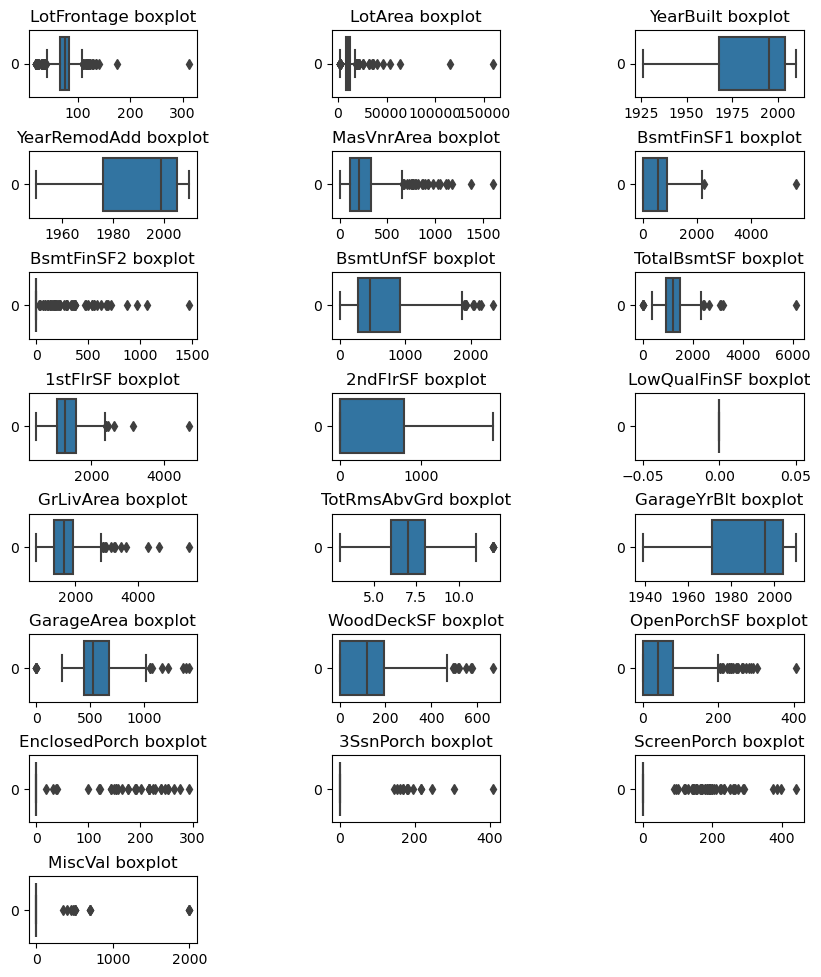

In [33]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(10, 15))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(10, 3, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.8, wspace=0.8)
plt.show()

In [34]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

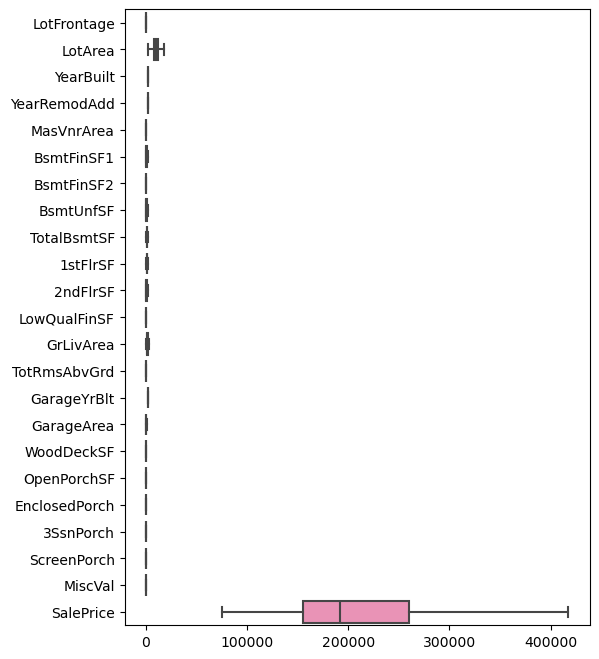

In [35]:
plt.figure(figsize=(6,8))
sns.boxplot(data= df , orient= "h")
plt.show()

In [36]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [37]:
mode = df['SaleCondition'].mode()[0]
print(mode)

Normal


In [38]:
vc = df['SaleCondition'].value_counts()
print(vc)

SaleCondition
Normal     459
Partial     82
Abnorml     34
Family       9
Alloca       3
AdjLand      1
Name: count, dtype: int64


In [39]:
categories = vc.index.to_numpy()
print(categories)

['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']


In [40]:
counts = vc.values
print(counts)

[459  82  34   9   3   1]


In [41]:
counts <= 10

array([False, False, False,  True,  True,  True])

In [42]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

## Remove Duplicates

In [46]:
df.duplicated().sum()

0

## Visualization 

In [47]:
len(num_cols)

22

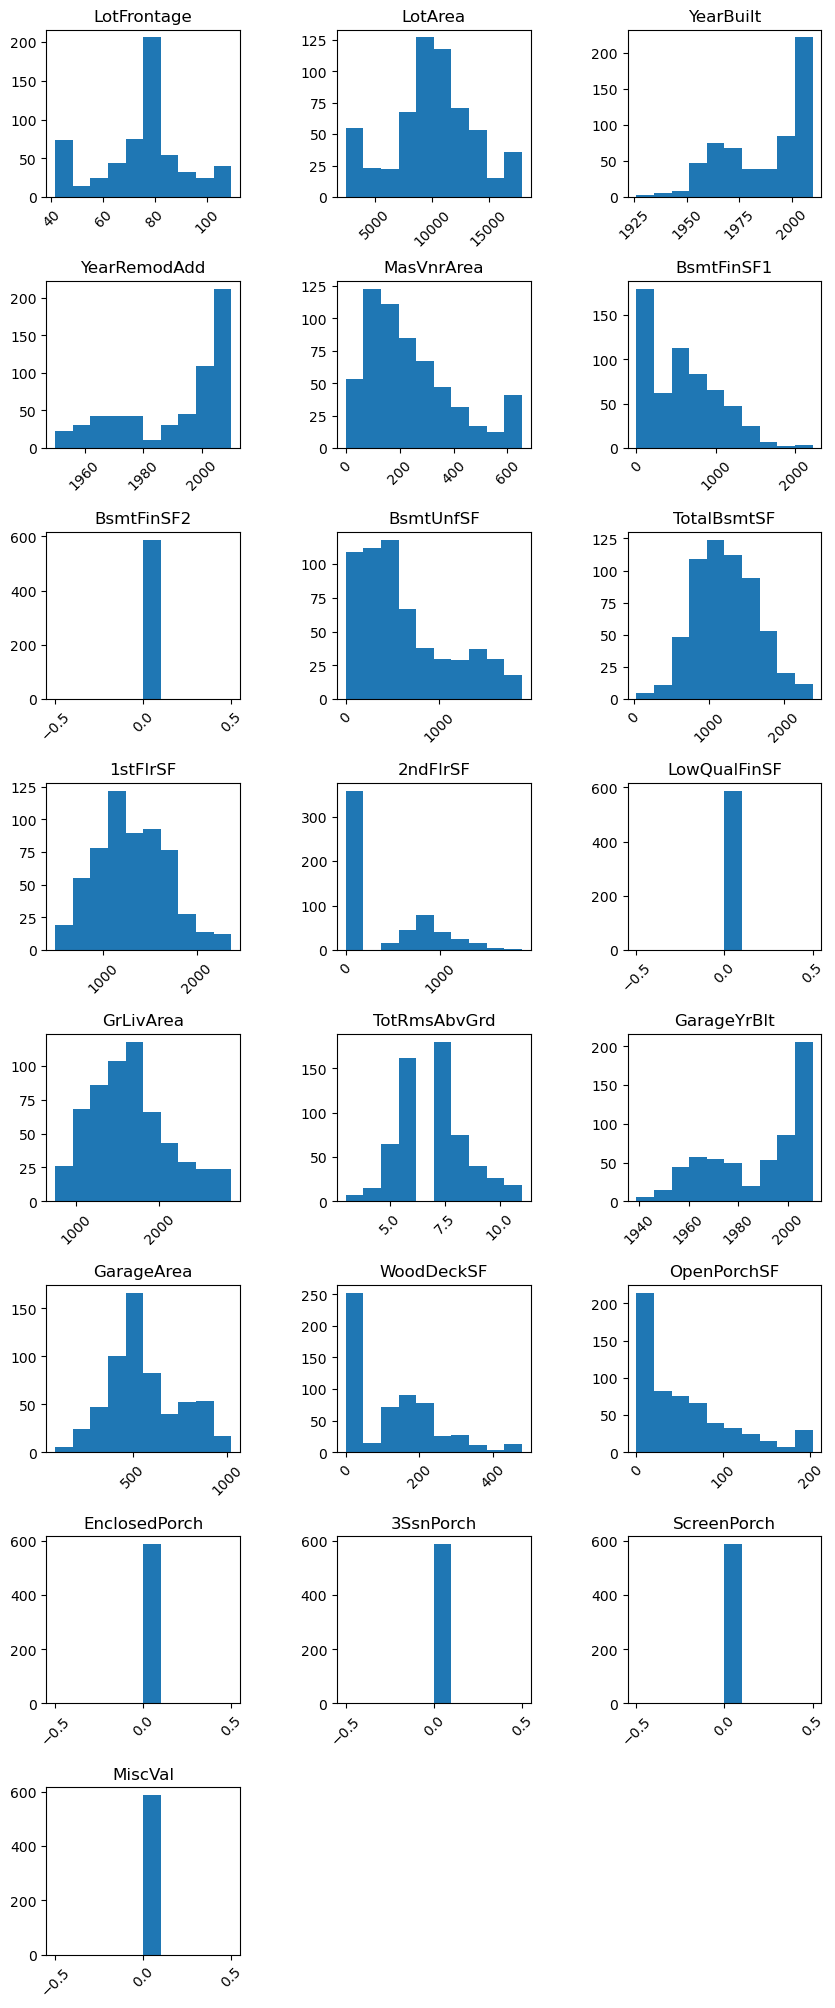

In [48]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [49]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

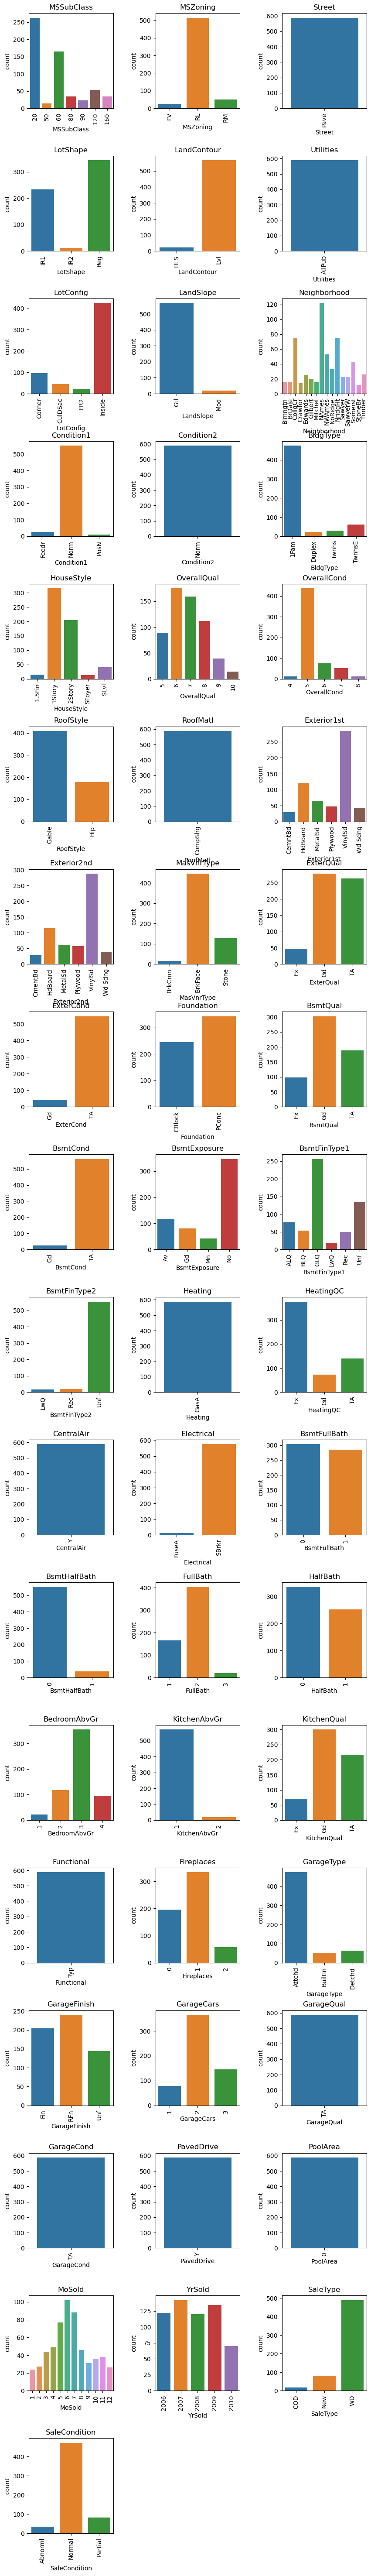

In [50]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [51]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

In [52]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

## Data Splitting

In [53]:
X = df.drop("SalePrice", axis=1)
y = df[["SalePrice"]]

## Normalization

In [54]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

## Encoding 

In [55]:
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Foundation', 'GarageType', 'GarageFinish']

In [56]:
nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
pd.DataFrame(X[nominal_cols].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType
0,3,3,2,4,16,5,2,6,6,3


In [57]:
binary_cols = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']
onehot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'RoofStyle', 'MasVnrType']

In [58]:

labels = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Foundation': {'PConc': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'Stone': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
}

In [59]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

In [61]:
from category_encoders import OneHotEncoder
onehot_encoder = OneHotEncoder(cols=onehot_cols)
X = onehot_encoder.fit_transform(X)

In [62]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [63]:
X

,MSZoning_1,MSZoning_2,MSZoning_3,LotFrontage,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LotConfig_1,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1,0,0,0.345588,1,0,0,1,0,1,...,0,5,0.901408,2,2,0.491379,0.000000,0.301235,2,2008
2,1,0,0,0.389706,0,1,0,1,0,1,...,1,5,0.873239,2,2,0.556034,0.000000,0.207407,9,2008
4,1,0,0,0.625000,0,1,0,1,0,0,...,1,5,0.859155,2,3,0.801724,0.400000,0.414815,12,2008
6,1,0,0,0.492647,1,0,0,1,0,1,...,1,5,0.915493,2,2,0.586207,0.531250,0.281481,8,2007
7,1,0,0,0.507353,0,1,0,1,0,0,...,2,5,0.478873,2,2,0.422414,0.489583,1.000000,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1,0,0,0.507353,0,1,0,1,0,0,...,0,5,0.323944,1,1,0.237069,0.543750,0.192593,4,2010
1447,1,0,0,0.566176,1,0,0,1,0,1,...,1,5,0.788732,2,2,0.500000,0.000000,0.320988,12,2007
1451,1,0,0,0.536765,1,0,0,1,0,1,...,1,5,0.971831,3,3,0.806034,0.000000,0.177778,5,2009
1452,0,0,1,0.000000,1,0,0,1,0,1,...,0,5,0.929577,3,2,0.466595,0.000000,0.138272,5,2006
